# Glacial Cycles (Pollard 1982)
## Amita and Miriam

### Introduction
Ice sheet dynamics is central to understanding Earth's history and future, especially given rising global temperatures. Melting of ice sheets contributes directly to sea level changes which has negative impacts on many communities and wildlife. However, the long term dynamics of ice sheet melt and formation, caused by changes in Earth's orbit, have facinating effects. Understanding the long term dynamics well allows us to distinguish expected behavior from abnormal melting. <br>

##### Milankovich Cycles
source: https://science.nasa.gov/science-research/earth-science/milankovitch-orbital-cycles-and-their-role-in-earths-climate/ <br>
Milankovich cycles are small perterbations in Earth's orbit that change the total level of sunlight the planet recieves. The main parameters are eccentricity, or the shape of the orbit, obliquity, or the angle of tilt of Earth's axis, and precession, the direction Earth's axis of rotation is pointed. These three variations occur at well known intervals which align with past ice ages, confirmed from ice core data. (Pollard 1982). The main cycles occur in intervals of 20, 40, and 100 kyr. Previous models have captures the 20 and 40 kyr cycles but failed to capture the 100 kyr cycle. The 100 kyr cycle is especially prevelant in Northern Hemisphere ice sheets which is the focus of this paper. 

##### Previous Work


### Equations
The thickness, $H$ of an ice sheet over time can be modeled with a nonlinear diffusion equation:
$$ \frac{\partial H}{\partial t} = A \frac{\partial}{\partial x} \left[H^{\alpha}\left| \frac{\partial(H + h)}{\partial x}^{\beta}\right|\frac{\partial(H + h)}{\partial x}\right] + G(H + h, x, \text{orbit})$$ 

$t$: time <br>
$x$: distance to the south <br>
$h$: the elevation of the bedrock surface above a fixed reference level (taken as the present mean sea level) <br>

For this model, the bedrock will always be in isostatic equilibrium with the ice load so $h = -rH$, where r is the ice/rock density ratio. <br>

For this model,<br>
$A = 5.77\times10^{-4} \text{m}^{-3}\text{yr}^{-1}$<br>
$\alpha = 5$<br>
$\beta = 2$<br> 
$r = 0.3$<br>

$G$ is the net annual mass balance on the ice sheet surface, depending on snowfall and ice melt, and is given by<br>

$$ G = \begin{cases}
a(h+h' -E) - b(h+h'-E)^2 & h+h' - E \leq 1500 \text{ m} \\
0.56 & h+h' - E > 1500 \text{ m}
\end{cases} \text{     m yr}^{-1} $$
where $E$ is defined 
$$E = E_0(x) + k \Delta Q$$
$E_0(x)$: the present equlibrium line<br>
$k$: insolation sensitivity <br>
$\Delta Q$: is the difference in the summer half-year insolation at $55 \degree$ N from that of the present <br>

##### Boundary Conditions & Initial Conditons
To find the boundary conditions, we assume the cross-section of the ice sheet is a rectangle with length  $4889 \text{ km}$ (the distance between model boundaries of $30 \degree$ N and $74 \degree$ N). The height is calculated by dividing the given ice sheet cross-sectional area from Pollard by the length of the ice sheet. When $t = 700$ (700,000 years ago), the ice sheet cross sectional area is $4.5 \times 10^9 \text{ m}^2$. Thus the height of the ice sheet is $920.43 \text{ m}$. Repeating the calculations for the other boundary, at $t = 0$ (present day), the cross-sectional area is $3.5 \times 10^9 \text{ m}^2$ so the height is $715.89 \text{ m}$ 

##### Assumptions

* What are the fundamental physical/chemical/etc. processes? 
* Relevant equations and potentially where they come from (i.e. how are they derived)
* Describe all terms, parameters, boundary conditions and initial conditions 
* Describe any assumptions being made

### Numerical methods

* Describe the numerical methods used.
* Why did you choose to use these methods
* Code works as intended

### Importing, time stepping, and grid spacing


In [1]:
import numpy as np
import climlab # package used for calculating orbital parameters overtime
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation
import matplotlib.pyplot as plt


#timesteping 
t_i = 0
t_f = -700000 #run model for the past 700,000 years 
d_t = 100 #use time step of 100 years
t = np.arange(t_f, t_i+1, 100)
t_kyr = (t/(1000)) # years in kyr, needed to calculate orbital parameters

#grid spacing
x_i = 30 # degrees North latitude (southern boundary)
x_f = 74 # degrees North latitude (northern boundary)
d_x = 0.5 #0.5 degrees as spacial step equivalent to 55km
x = np.arange(x_i, x_f+.5, d_x)


Tokenization took: 2.13 ms
Type conversion took: 1.30 ms
Parser memory cleanup took: 0.00 ms


### Calculating orbital parameters

In [2]:

days = np.linspace(1,365.24, 365)/365 * 365.24
orb = OrbitalTable.interp(kyear=t_kyr ) #calculate orbital parameters for past 700,000 years, every 100 years

Q = daily_insolation(x, days, orb) #calculate daily insolation per every 100 years based on orbit parameters


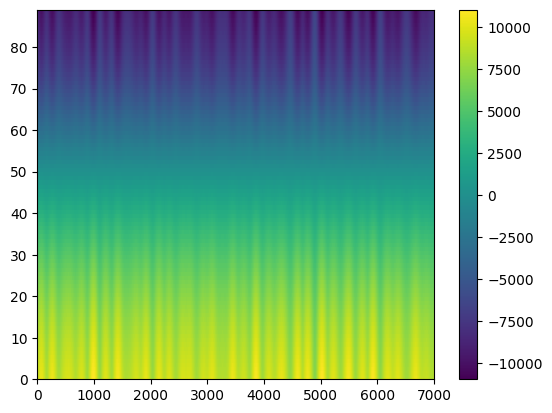

In [3]:
#to calculate summer half year insolation, we first need to find the upper half of the daily insolations
# we do this by splitting the data by the along median, then adding the remaining values 

delta_Q = np.zeros((len(x), len(t_kyr)))

for i in range(len(t_kyr)):
    daily_55 = Q[50, :, i]
    median_insolation_55 = np.median(daily_55)
    summer_total_55 = sum(daily_55[daily_55>median_insolation_55])
    for j in range(len(x)):
        daily = Q[j,:, i]
        median_insolation = np.median(daily)
        summer_total = sum(daily[daily> median_insolation])
        #now need to subtract the 55 degree N summer half year from each latitute to find delta Q
        delta_Q[j, i] = summer_total - summer_total_55


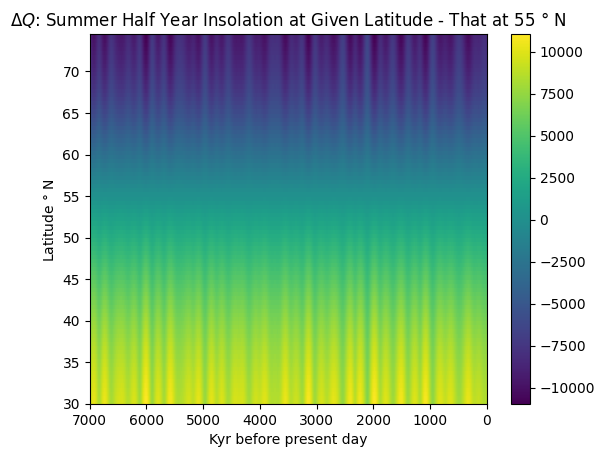

In [36]:
# We can plot delta_Q over our time scale to see the Milankovich cycles
plt.figure()
ax = plt.axes()
plt.pcolor(delta_Q)
plt.colorbar()
ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000], ["7000", "6000", "5000", "4000", "3000", "2000", "1000", "0"])
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80], ["30", "35", "40", "45", "50", "55", "60", "65", "70"])
plt.xlabel("Kyr before present day")
plt.ylabel("Latitude $\degree $ N ")
plt.title("$\Delta Q$: Summer Half Year Insolation at Given Latitude - That at 55 $\degree$ N" )

plt.show()


In [ ]:

# now we need to calculate E0 the present equilibrium line
def E0(x):
    return (9e-4 * x) - (6.57e-2)

#now we can combine E0 and delta_Q
k = 25 #insolation sensitivity, meter light-years^-1 day
def E(x, t):
    return E0(x) + k * delta_Q[x,t] #might have to change indexing later

#Finally we define G, the nonlinear term of the diffusion equation 
a = 0.81e-3 #years^-1
b = 0.3e-6 #meters^-3 years^-1
def G(x, t, h):
    if (h - E(x,t) <= 1500):
        return a*(h-E) - b*(h-E)**2
    else:
        return 0.56


### Results

* What simulations did you run with the model?
* Describe the results.
* How do the results compare with any known solutions, or data?
* How do the results change with different methods, time steps, grid spacing, or model parameters?
* What did the model tell you about the process you were studying?
* How could the model be improved in terms of methods used or processes included?